In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

## Распределение выживших среди мужчин и женщин по классу билета.

In [4]:
surv_by_male = df[df.Sex == 'male'].groupby('Pclass').Survived.mean()
surv_by_female = df[df.Sex == 'female'].groupby('Pclass').Survived.mean()
surv_by_male

Pclass
1    0.368852
2    0.157407
3    0.135447
Name: Survived, dtype: float64

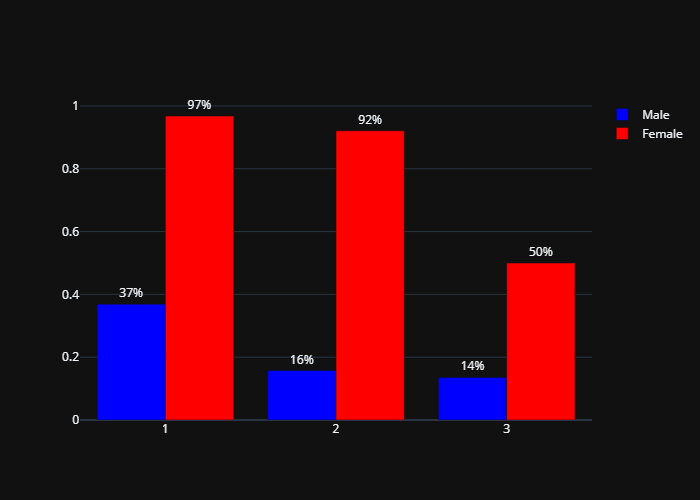

In [5]:
import plotly.graph_objects as go

data = [go.Bar(name='Male', x=surv_by_male.index, y=surv_by_male,
               marker_color='blue', text=surv_by_male*100),
        go.Bar(name='Female', x=surv_by_female.index, y=surv_by_female,
               marker_color='red', text=surv_by_female*100),]
fig = go.Figure(data)
fig.update_traces(texttemplate='%{text:.0f}%', textposition='outside')
fig.show("png")

## Круговая диаграмма для признака "класс пассажира" (количество людей в каждом классе)

In [6]:
size_by_class = df.groupby('Pclass').size()
size_by_class

Pclass
1    216
2    184
3    491
dtype: int64

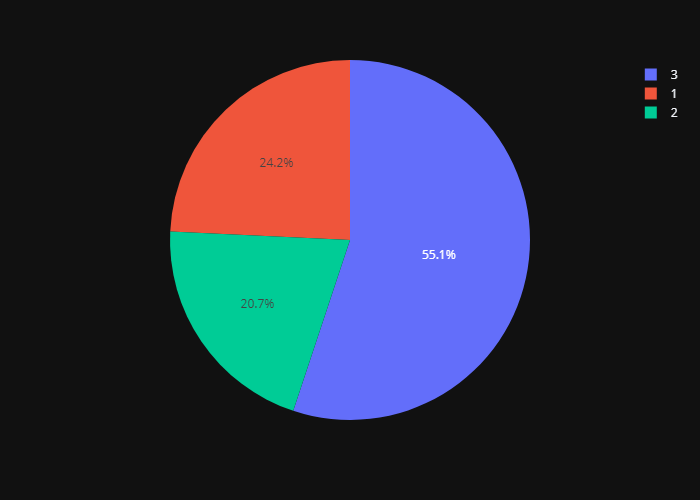

In [7]:
import plotly.express as px

fig = px.pie(size_by_class, values=size_by_class, names=size_by_class.index)
fig.show("png")

## Распределение возрастов всех пассажиров.

In [8]:
df.Age.isnull().sum()

177

In [9]:
ages = df.Age.dropna()
len(ages)

714

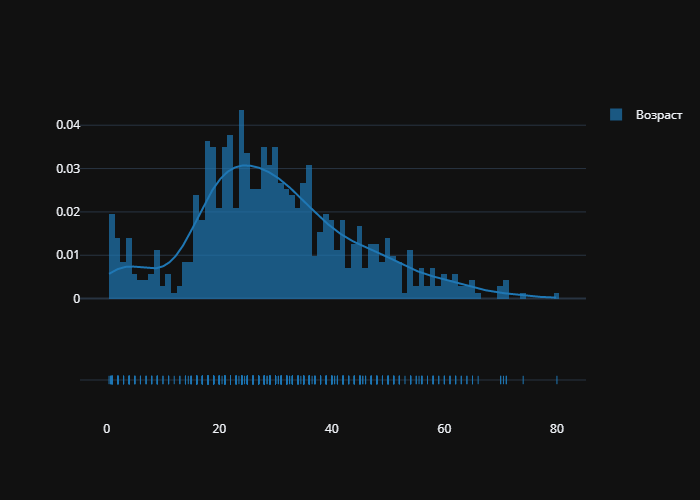

In [10]:
import plotly.figure_factory as ff

fig = ff.create_distplot([ages], ['Возраст'])
fig.show("png")